## Data Insertion

// Create nodes
CREATE (a:Person {name: 'Alice', age: 24})
CREATE (b:Person {name: 'Bob', age: 27})
CREATE (c:Person {name: 'Carol', age: 22})

// Create relationships
CREATE (a)-[:FRIENDS_WITH]->(b)
CREATE (b)-[:FRIENDS_WITH]->(c)


## Confirm Data Insertion

// Retrieve all persons who are friends with 'Bob'
MATCH (bob {name: 'Bob'})-[:FRIENDS_WITH]->(friends)
RETURN friends.name

## Create additional Relationship
// You first locate the nodes you created by their properties (like name in this case). After matching the nodes, // you create the relationships among them. This way, you're specifically instructing Neo4J to connect the nodes 
// that have already been created

MATCH (a:Person {name: 'Alice'}), (c:Person {name: 'Carol'})
CREATE (c)-[:FRIENDS_WITH]->(a)

## Clear out Database

// matches all nodes n in the database and deletes each matched node n and all relationships connected to those 
// nodes. The DETACH keyword is crucial because it automatically removes the relationships before deleting the 
// nodes, preventing issues related to trying to delete connected nodes

MATCH (n)
DETACH DELETE n

## Delete specific nodes

// delete the nodes for 'Alice', 'Bob', and 'Carol', ensuring that all their relationships are also removed

MATCH (a:Person {name: 'Alice'}), 
      (b:Person {name: 'Bob'}), 
      (c:Person {name: 'Carol'})
DETACH DELETE a, b, c


## Extending the Social Network Graph: broken graph

// Adding more people
CREATE (d:Person {name: 'Dave', age: 30})
CREATE (e:Person {name: 'Eve', age: 35})
CREATE (f:Person {name: 'Frank', age: 40})
CREATE (g:Person {name: 'Grace', age: 28})

// Adding different types of relationships
CREATE (a)-[:COLLEAGUE_WITH]->(d)
CREATE (a)-[:FRIENDS_WITH]->(e)
CREATE (b)-[:COLLEAGUE_WITH]->(e)
CREATE (c)-[:FRIENDS_WITH]->(f)
CREATE (d)-[:FRIENDS_WITH]->(g)
CREATE (e)-[:MANAGES]->(g)

// Create some interest nodes and link people to these
CREATE (sports:Interest {type: 'Sports'})
CREATE (music:Interest {type: 'Music'})
CREATE (tech:Interest {type: 'Technology'})

// Connecting people to interests
CREATE (a)-[:INTERESTED_IN]->(sports)
CREATE (b)-[:INTERESTED_IN]->(music)
CREATE (c)-[:INTERESTED_IN]->(tech)
CREATE (d)-[:INTERESTED_IN]->(tech)
CREATE (e)-[:INTERESTED_IN]->(sports)
CREATE (f)-[:INTERESTED_IN]->(music)
CREATE (g)-[:INTERESTED_IN]->(tech)

// Adding a location aspect to our network
CREATE (lagos:Location {city: 'Lagos', country: 'Nigeria'})
CREATE (nairobi:Location {city: 'Nairobi', country: 'Kenya'})
CREATE (london:Location {city: 'London', country: 'UK'})

// Connecting people to locations
CREATE (a)-[:LIVES_IN]->(lagos)
CREATE (b)-[:LIVES_IN]->(nairobi)
CREATE (c)-[:LIVES_IN]->(lagos)
CREATE (d)-[:LIVES_IN]->(london)
CREATE (e)-[:LIVES_IN]->(london)
CREATE (f)-[:LIVES_IN]->(nairobi)
CREATE (g)-[:LIVES_IN]->(lagos)


## Extending the Social Network Graph: complete graph

// Assuming Alice, Bob, and Carol already exist in the database

// Match existing nodes
MATCH (a:Person {name: 'Alice'}), (b:Person {name: 'Bob'}), (c:Person {name: 'Carol'})

// Create new people and relationships simultaneously
CREATE (d:Person {name: 'Dave', age: 30})
CREATE (e:Person {name: 'Eve', age: 35})
CREATE (f:Person {name: 'Frank', age: 40})
CREATE (g:Person {name: 'Grace', age: 28})
CREATE (a)-[:COLLEAGUE_WITH]->(d)
CREATE (a)-[:FRIENDS_WITH]->(e)
CREATE (b)-[:COLLEAGUE_WITH]->(e)
CREATE (c)-[:FRIENDS_WITH]->(f)
CREATE (d)-[:FRIENDS_WITH]->(g)
CREATE (e)-[:MANAGES]->(g)

// Create interest nodes
CREATE (sports:Interest {type: 'Sports'})
CREATE (music:Interest {type: 'Music'})
CREATE (tech:Interest {type: 'Technology'})

// Connecting people to interests
CREATE (a)-[:INTERESTED_IN]->(sports)
CREATE (b)-[:INTERESTED_IN]->(music)
CREATE (c)-[:INTERESTED_IN]->(tech)
CREATE (d)-[:INTERESTED_IN]->(tech)
CREATE (e)-[:INTERESTED_IN]->(sports)
CREATE (f)-[:INTERESTED_IN]->(music)
CREATE (g)-[:INTERESTED_IN]->(tech)

// Create location nodes
CREATE (lagos:Location {city: 'Lagos', country: 'Nigeria'})
CREATE (nairobi:Location {city: 'Nairobi', country: 'Kenya'})
CREATE (london:Location {city: 'London', country: 'UK'})

// Connecting people to locations
CREATE (a)-[:LIVES_IN]->(lagos)
CREATE (b)-[:LIVES_IN]->(nairobi)
CREATE (c)-[:LIVES_IN]->(lagos)
CREATE (d)-[:LIVES_IN]->(london)
CREATE (e)-[:LIVES_IN]->(london)
CREATE (f)-[:LIVES_IN]->(nairobi)
CREATE (g)-[:LIVES_IN]->(lagos)



In [7]:
## Use Python to extend the graph

## Use the py2neo library, which allows for interaction with Neo4J from a Python environment.

pip install py2neo

In [6]:
from py2neo import Graph, Node, Relationship

# Connect to Neo4J instance
graph = Graph("bolt://localhost:7687", auth=("neo4j", "your_password"), name="aucatest")

# Match existing nodes
alice = graph.nodes.match("Person", name="Alice").first()
bob = graph.nodes.match("Person", name="Bob").first()
carol = graph.nodes.match("Person", name="Carol").first()

# Create new nodes
dave = Node("Person", name="Dave", age=30)
eve = Node("Person", name="Eve", age=35)
frank = Node("Person", name="Frank", age=40)
grace = Node("Person", name="Grace", age=28)

# Add new nodes to the graph
graph.create(dave)
graph.create(eve)
graph.create(frank)
graph.create(grace)

# Create new relationships
rel1 = Relationship(alice, "COLLEAGUE_WITH", dave)
rel2 = Relationship(alice, "FRIENDS_WITH", eve)
rel3 = Relationship(bob, "COLLEAGUE_WITH", eve)
rel4 = Relationship(carol, "FRIENDS_WITH", frank)
rel5 = Relationship(dave, "FRIENDS_WITH", grace)
rel6 = Relationship(eve, "MANAGES", grace)

# Add relationships to the graph
graph.create(rel1)
graph.create(rel2)
graph.create(rel3)
graph.create(rel4)
graph.create(rel5)
graph.create(rel6)

Print('End of Code')

## Password Reset

ALTER USER neo4j SET PASSWORD 'your_password'

## --  Basic Queries: Retrieving Data with MATCH Statements

## Retrieve All People in the Database

MATCH (p:Person)
RETURN p

## Retrieve All Relationships

MATCH ()-[r]->()
RETURN r

## Retrieve All People and Their Friends

MATCH (p:Person)-[:FRIENDS_WITH]->(friend)
RETURN p.name AS Person, friend.name AS Friend

## Retrieve All Managers and Their Direct Reports

MATCH (manager:Person)-[:MANAGES]->(report:Person)
RETURN manager.name AS Manager, report.name AS Direct_Report

## --  Queries with Filtering, Sorting, and Limiting

## Retrieve People Based on Specific Interest

MATCH (p:Person)-[:INTERESTED_IN]->(i:Interest {type: 'Sports'})
RETURN p.name AS Sports_Enthusiasts

## List People Living in a Specific Location, Sorted by Age

MATCH (p:Person)-[:LIVES_IN]->(l:Location {city: 'Lagos'})
RETURN p.name AS Name, p.age AS Age
ORDER BY p.age

## Find Friends of a Specific Person and Sort by Name

MATCH (p:Person {name: 'Alice'})-[:FRIENDS_WITH]->(friend)
RETURN friend.name AS Friend_Name
ORDER BY friend.name

## Find Top 3 Oldest People in the Database

MATCH (p:Person)
RETURN p.name AS Name, p.age AS Age
ORDER BY p.age DESC
LIMIT 3

## People with More Than One Interest. Also try 0

MATCH (p:Person)-[:INTERESTED_IN]->(i:Interest)
WITH p, COUNT(i) AS Interests
WHERE Interests > 1
RETURN p.name AS Name, Interests
ORDER BY Interests DESC

## Find People Who Manage Others and Live in a Specific Location

MATCH (manager:Person)-[:MANAGES]->(:Person),
      (manager)-[:LIVES_IN]->(l:Location {city: 'London'})
RETURN DISTINCT manager.name AS Manager, l.city AS City

## --  Advanced Queries and Functions

## Count the Number of Friends Each Person Has

MATCH (p:Person)-[:FRIENDS_WITH]->(friend)
RETURN p.name AS Person, COUNT(friend) AS NumberOfFriends
ORDER BY NumberOfFriends DESC

## Find the Shortest Path of Friendships Between Two People

MATCH path=shortestPath((p1:Person {name: 'Alice'})-[:FRIENDS_WITH*]-(p2:Person {name: 'Frank'}))
RETURN path

## --  Data Analytics

## Analyze Average Age of People by Interest

// This query calculates the average age of people grouped by their interests, which can provide insights into the // demographic distribution of interests.

MATCH (p:Person)-[:INTERESTED_IN]->(i:Interest)
RETURN i.type AS Interest, AVG(p.age) AS AverageAge
ORDER BY AverageAge DESC

## Distribution of People Across Locations

// analyze how many people live in each location, which is useful for understanding geographical distributions.

MATCH (p:Person)-[:LIVES_IN]->(l:Location)
RETURN l.city AS City, COUNT(p) AS NumberOfPeople
ORDER BY NumberOfPeople DESC

## --  Data Analytics in Python

In [ ]:
## If not already installed, you need to install py2neo and pandas.

pip install py2neo pandas

     Interest  AverageAge
0       Music   33.500000
1      Sports   29.500000
2  Technology   26.666667


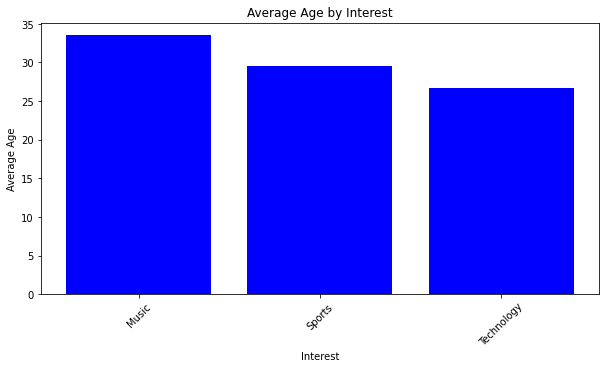

In [13]:
from py2neo import Graph
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the specific Neo4J database
graph = Graph("bolt://localhost:7687", name="aucatest", auth=("neo4j", "neo4j_neo4j"))

# Cypher query to fetch data
query = """
MATCH (p:Person)-[:INTERESTED_IN]->(i:Interest)
RETURN i.type AS Interest, AVG(p.age) AS AverageAge
ORDER BY AverageAge DESC
"""

# Execute the query and fetch data
data = graph.run(query).data()

# Convert to DataFrame
df = pd.DataFrame(data)

# Print DataFrame to check contents and ensure correct data types
print(df)

# Plot the results if data is present
if not df.empty and 'Interest' in df.columns and 'AverageAge' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.bar(df['Interest'], df['AverageAge'], color='blue')
    plt.xlabel('Interest')
    plt.ylabel('Average Age')
    plt.title('Average Age by Interest')
    plt.xticks(rotation=45)  # Rotate labels to handle potentially long interest names
    plt.show()
else:
    print("DataFrame is empty or does not contain the expected columns.")
